In [1]:
import cv2
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline  

from heatmap_estimator import HeatmapEstimator
from projection_dataset import ProjectionDataset
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = "../data/projections"
subjects = ["P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8"]
gestures = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "I", "IP", "L", "MP", "RP", "T", "TIP", "Y"]

plane = "XY" # Other planes: YZ and ZX

In [3]:
dataset = ProjectionDataset(dataset_dir, subjects, gestures, plane)
train_dataloader = DataLoader(dataset, batch_size=256, shuffle=True)

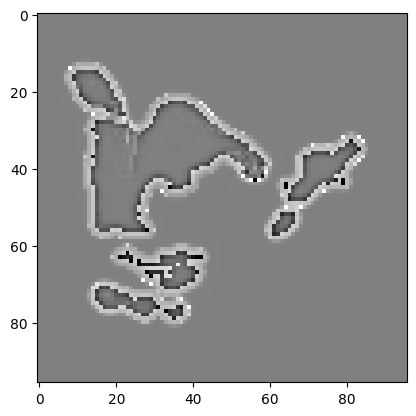

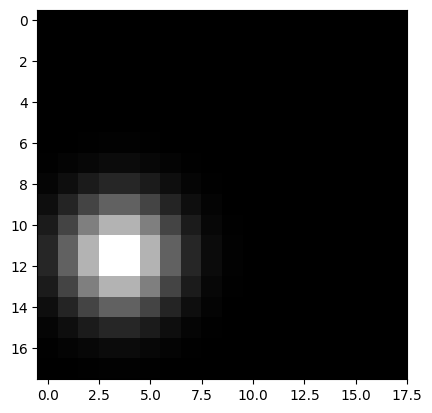

In [6]:
# Visualize sample
image, heatmap_gt = next(iter(train_dataloader))

plt.imshow(torch.squeeze(image[0], 0).numpy(), cmap='gray', vmin=-1, vmax=1)
plt.show()

plt.imshow(torch.squeeze(heatmap_gt[0][0], 0).numpy(), cmap='gray', vmin=0, vmax=1)
plt.show()

In [7]:
# Load the model
device = 'cuda'
model = HeatmapEstimator().to(device)

In [8]:
# Configure the optimizer and criterion
optimizer = torch.optim.SGD(model.parameters(), lr=0.2, momentum=0.9, weight_decay=0.0005)
criterion = torch.nn.MSELoss()

In [12]:
epochs = 50
for epoch in range(epochs):
    epoch_loss = 0
    print("Computing epoch", epoch)
    
    for lcn, heatmaps in train_dataloader:    
        optimizer.zero_grad()
        
        lcn = lcn.type(torch.FloatTensor).to(device)
        lcn = torch.unsqueeze(lcn, dim=1)
        print(lcn)
        pred = model(lcn)
        
        heatmaps = heatmaps.type(torch.FloatTensor).to(device)
        loss = criterion(pred, heatmaps)
        
        loss.backward()
        optimizer.step()
        
        print("Minibatch Loss:", loss.item())
        epoch_loss += loss.item()
        
    print("Loss at epoch", epoch, ":", epoch_loss)
        

Computing epoch 0
tensor([[[[-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16],
          [-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16],
          [-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16],
          ...,
          [-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16],
          [-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16],
          [-1.1996e-16, -1.1996e-16, -1.1996e-16,  ..., -1.1996e-16,
           -1.1996e-16, -1.1996e-16]]],


        [[[-7.1894e-17, -7.1894e-17, -7.1894e-17,  ..., -7.1894e-17,
           -7.1894e-17, -7.1894e-17],
          [-7.1894e-17, -7.1894e-17, -7.1894e-17,  ..., -7.1894e-17,
           -7.1894e-17, -7.1894e-17],
          [-7.1894e-17, -7.1894e-17, -7.1894e-17,  ..., -7.1894e-17,
           -7.1894e-17, -7.1894e-17],


tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]],


        [[[ 1.2234e-16,  1.2234e-16,  1.2234e-16,  ...,  1.2234e-16,
            1.2234e-16,  1.2234e-16],
          [ 1.2234e-16,  1.2234e-16,  1.2234e-16,  ...,  1.2234e-16,
            1.2234e-16,  1.2234e-16],
          [ 1.2234e-16,  1.2234e-16,  1.2234e-16,  ...,  1.2234e-16,
            1.2234e-16,  1.2234e-16],
          ...,
   

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]],


        [[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
   

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]]],


        [[[-2.3020e-16, -2.3020e-16, -2.3020e-16,  ..., -2.3020e-16,
           -2.3020e-16, -2.3020e-16],
          [-2.3020e-16, -2.3020e-16, -2.3020e-16,  ..., -2.3020e-16,
           -2.3020e-16, -2.3020e-16],
          [-2.3020e-16, -2.3020e-16, -2.3020e-16,  ..., -2.3020e-16,
           -2.3020e-16, -2.3020e-16],
          ...,
   

KeyboardInterrupt: 